# MPDAC Online Demo on Adverse Weather Removal

This is the official demo of the IEEE Access paper:

[Multiple Adverse Weather Removal Using Masked-Based Pre-Training and Dual-Pooling Adaptive Convolution](https://ieeexplore.ieee.org/document/10506517)

## Git clone [MPDAC](https://github.com/ShugoYamashita/MPDAC) repository

In [ ]:
import os
if os.path.isdir('MPDAC'):
  !rm -r MPDAC
!git clone https://github.com/ShugoYamashita/MPDAC
%cd MPDAC

Cloning into 'MPDAC'...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 69 (delta 14), reused 25 (delta 10), pack-reused 37
Receiving objects: 100% (69/69), 58.44 MiB | 13.39 MiB/s, done.
Resolving deltas: 100% (16/16), done.
/content/MPDAC


## Set up the enviroment

## Preparation

In [ ]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.utils as utils
from PIL import Image
import os
import argparse
from models.ImageRestorationModel import ImageRestorationModel
import matplotlib.pyplot as plt

def get_args_parser():
    parser = argparse.ArgumentParser(description='Demonstration of adverse weather removal')
    parser.add_argument('--input_image_path', type=str, help='Path to a input image', default='./imgs/degraded_imgs/sample_raindrop.png')
    parser.add_argument('--save_dir', type=str, help='Path to a save directory', default='./imgs/restored_imgs')
    parser.add_argument('--weights_path', type=str, help='Path to model weights', default='./weights/Small_AllWeather.pth')
    parser.add_argument('--model_size', type=str, help='model size', choices=['small', 'large'], default='small')
    return parser

def preprocess_image(image_path):
    """
    Preprocess the image by transforming to a tensor,
    normalizing, and adding a batch dimension.
    """
    image = Image.open(image_path).convert('RGB')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    image = transform(image).unsqueeze(0)  # Add a batch dimension
    return image

def pad_img(img, img_multiple_of=32):
    """
    Reflect padding to ensure the image dimensions are multiples of 32.
    """
    height, width = img.shape[2], img.shape[3]

    H = (height + img_multiple_of - 1) // img_multiple_of * img_multiple_of
    W = (width + img_multiple_of - 1) // img_multiple_of * img_multiple_of
    padh = H - height
    padw = W - width

    img = F.pad(img, (0,padw,0,padh), 'reflect')

    return img, height, width

def inference(input_image_path, output_image_path):
    input_image = preprocess_image(input_image_path)
    input_image, height, width = pad_img(input_image)
    input_image = input_image.to(device)

    with torch.no_grad():
        restored_image = model(input_image)

    restored_image = torch.clamp(restored_image, 0, 1)
    restored_image = restored_image[:, :, :height, :width]

    utils.save_image(restored_image[0], output_image_path)

def display_2images(path_image1, path_image2):
    image1 = Image.open(path_image1)
    image2 = Image.open(path_image2)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].imshow(image1)
    ax[0].axis('off')
    ax[0].set_title('Input (Degraded Image)')
    ax[1].imshow(image2)
    ax[1].axis('off')
    ax[1].set_title('Output (Clear Image)')
    plt.show()

## Create Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("device:\t{}".format(device))

model = ImageRestorationModel(model_size='small')
model = model.to(device)
model.eval()

model.load_state_dict(torch.load('./weights/Small_AllWeather.pth'))

device:	cuda


<All keys matched successfully>

# Inference

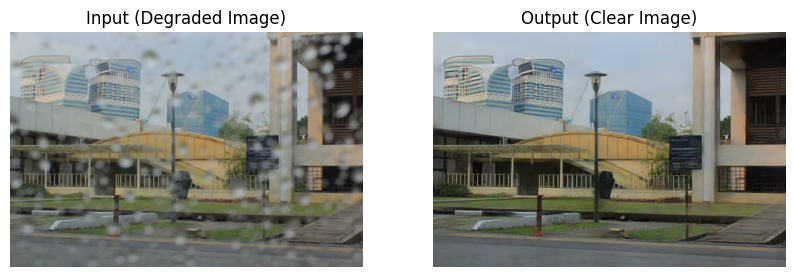

In [ ]:
# Raindrop Removal
input_image_path = './imgs/degraded_imgs/sample_raindrop.png'
output_image_path = './sample_raindrop.png'

inference(input_image_path, output_image_path)
display_2images(input_image_path, output_image_path)

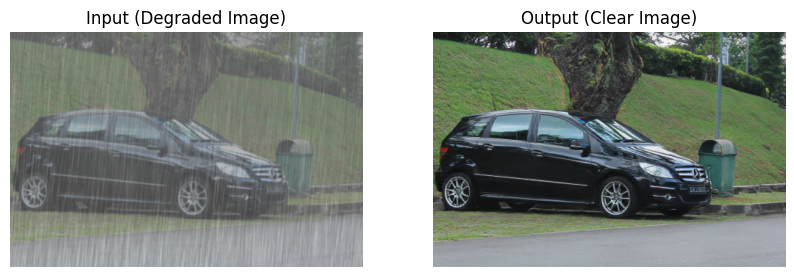

In [ ]:
# Rain & Fog Removal
input_image_path = './imgs/degraded_imgs/sample_rainfog.png'
output_image_path = './sample_rainfog.png'

inference(input_image_path, output_image_path)
display_2images(input_image_path, output_image_path)

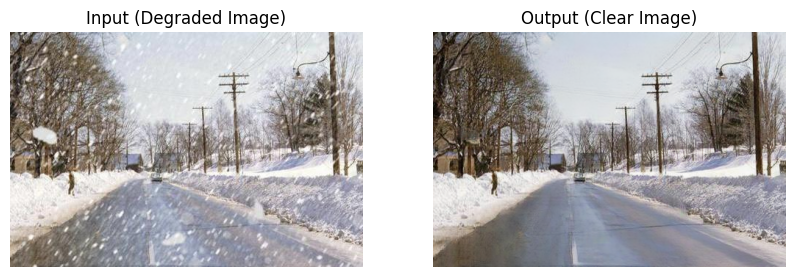

In [ ]:
# Rain & Fog Removal
input_image_path = './imgs/degraded_imgs/sample_snow.png'
output_image_path = './sample_snow.png'

inference(input_image_path, output_image_path)
display_2images(input_image_path, output_image_path)